Convolutional Neural Network On CIFAR 10 Dataset

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset,DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Define variables

In [2]:
# configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#hyper parameter
batch_size=256

Load  Cifar 10 Dataset

In [4]:
#normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load cifar dataset
cifar10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

# define train and test loader
train_loader = torch.utils.data.DataLoader(dataset=cifar10_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=cifar10_testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Hyper Parameter

In [11]:
#hyper parameter

learning_rate=0.001
epoch=100


Define the Network Architecture


In [12]:
class CNN_Network(nn.Module):
    def __init__(self):
        super(CNN_Network, self).__init__()
        self.conv1=nn.Conv2d(3, 64, kernel_size=5, stride=1)       
        self.conv2 =  nn.Conv2d(64, 64, kernel_size=5, stride=1)
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear1=nn.Linear(64 * 5 * 5, 256)
        self.linear2= nn.Linear(256, 10) 
      

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1relu=F.relu(conv1)
        conv2 = self.conv2(conv1relu)
        conv2relu=F.relu(conv2)
        conv2pool=self.pool1(conv2relu)
        conv3 = self.conv3(conv2pool)
        conv3relu=F.relu(conv3)
        conv3pool=self.pool2(conv3relu)
        x=conv3pool.view(-1,64*5*5)
        x=self.linear1(x)
        x=F.relu(x)
        y_pred=self.linear2(x)
        return conv1relu,conv2relu,conv3relu,y_pred


Specify Loss Function and Optimizer

In [13]:
model = CNN_Network().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Train the Network

Epoch 1/100 , loss= 1.7217513061299616
Epoch 2/100 , loss= 1.386985137754557
Epoch 3/100 , loss= 1.2248530844036414
Epoch 4/100 , loss= 1.0937874152952312
Epoch 5/100 , loss= 1.0031518993937238
Epoch 6/100 , loss= 0.9298388459244553
Epoch 7/100 , loss= 0.8544494713447532
Epoch 8/100 , loss= 0.8009358361667517
Epoch 9/100 , loss= 0.7405911051497167
Epoch 10/100 , loss= 0.6986482690791694
Epoch 11/100 , loss= 0.6498889944383076
Epoch 12/100 , loss= 0.6006350194921299
Epoch 13/100 , loss= 0.5547954348885283
Epoch 14/100 , loss= 0.5164554430818071
Epoch 15/100 , loss= 0.4811149025145842
Epoch 16/100 , loss= 0.4419159224751044
Epoch 17/100 , loss= 0.41294816166770704
Epoch 18/100 , loss= 0.37324220869614155
Epoch 19/100 , loss= 0.3441588985068457
Epoch 20/100 , loss= 0.2996406867644008
Epoch 21/100 , loss= 0.28645654463646364
Epoch 22/100 , loss= 0.24186893598157533
Epoch 23/100 , loss= 0.22457369515786366
Epoch 24/100 , loss= 0.20823440860424722
Epoch 25/100 , loss= 0.18326090348466317
Epo

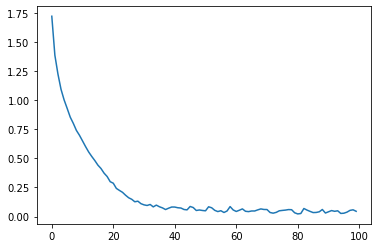

In [14]:
addloss = 0
lossarray = np.zeros(epoch)
accuracyarray = np.zeros(epoch)

for epochnumber in range(epoch):
    addloss = 0
    for i, (imges, labeles) in enumerate(train_loader):
        imges = imges.to(device)
        labeles = labeles.to(device)
        _,_,_,y_predicted = model(imges)
        loss = F.cross_entropy(y_predicted, labeles)
        loss.backward()
        addloss += loss.item()
        optimizer.step()
        optimizer.zero_grad()

    lossarray[epochnumber] = addloss / len(train_loader)
    print('Epoch {}/{} , loss= {}'.format(epochnumber + 1, epoch,lossarray[epochnumber] ))
plt.plot(range(epoch), lossarray)
plt.show()
   

Test the Trained Network

In [16]:
with torch.no_grad():
        total = 0
        correct = 0
        for i, (imges, labeles) in enumerate(test_loader):
            imges = imges.to(device)
            labeles = labeles.to(device)
            _,_,_,outputs = model(imges)
            _, predicted = torch.max(outputs.data, 1)
            total += labeles.size(0)
            correct += (predicted == labeles).sum().item()

        accuracy = correct / total
        accuracyarray[epochnumber]=accuracy
        print('test accuracy{}'.format(accuracy))


test accuracy0.6851
